In [161]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

In [162]:
ABIDE_FILE_NAME = "../data/ABIDE/timeseries_filt_global/male/asd/KKI_0050794_rois_aal.1D"
CORR_FILE_NAME = "../data/generated_filt_global/pearson_corr_raw/male/asd/KKI_0050794_rois_aal.1D"

In [163]:
def abide_file_to_numpy(filepath):

    with open(filepath, "r") as file: 
        reader = csv.reader(file, delimiter="\t")
        header = next(reader)
        rows = []
        for row in reader:
            rows.append(row)

    return np.array(rows).astype(float)

In [164]:
abide_array = abide_file_to_numpy(filepath=ABIDE_FILE_NAME)
corr_array = np.loadtxt(fname=CORR_FILE_NAME)

In [165]:
np.fill_diagonal(corr_array, 0)

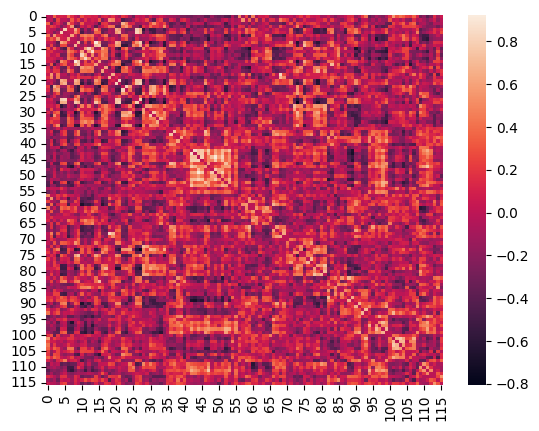

In [166]:
import seaborn as sns

ax = sns.heatmap(corr_array)
plt.show()

In [167]:
row, large_corr_col = np.unravel_index(corr_array.argmax(), corr_array.shape)
row, large_corr_col

(8, 14)

In [168]:
small_corr_col = corr_array[row].argmin()
small_corr_col

30

In [169]:
corr_array[row,large_corr_col], corr_array[row,small_corr_col], corr_array[large_corr_col, small_corr_col]

(0.922523, -0.637141, -0.641119)

In [170]:
x = np.array([_ for _ in range(abide_array.shape[0])])
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122])

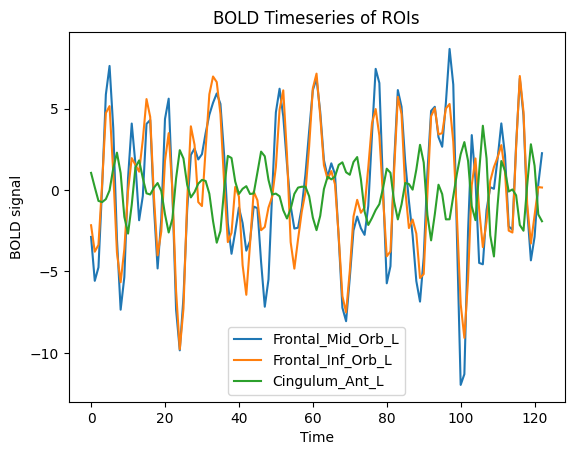

In [171]:
plt.clf()
plt.plot(x, abide_array[:, [row, large_corr_col, small_corr_col]])
plt.xlabel("Time")
plt.ylabel("BOLD signal")
plt.legend([f"Frontal_Mid_Orb_L", f"Frontal_Inf_Orb_L", f"Cingulum_Ant_L"])
plt.title("BOLD Timeseries of ROIs")
plt.show()

In [172]:
# SUBJECT: ../data/ABIDE/timeseries_filt_global/male/asd/KKI_0050794_rois_aal.1D
# ROIS: 8, 14, 30 (range is 0 - 115)
# Through manual inspection of the aal_labels.csv provided by PCP (and included in the ./data/BrainNetViewer directory), the regions correspond to Frontal_Mid_Orb_L (8), Frontal_Inf_Orb_L (14), Cingulum_Ant_L (30)